In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplot inline

import seaborn as sns

UsageError: Line magic function `%matplot` not found.


In [2]:
from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [9]:
#creating dataframe

df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

#checking head of dataframe
df.head(3)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension           ...             worst radius  \
0                 0.07871           ...                    25.38   
1                 0.05667           ...                    24.99   
2                 0.05999           ...                    23.57   

   worst texture  worst perimeter  worst area  worst smoothness  \
0          17.33            184.6      2019.0            0.1622   
1          23.41            158.8      1956.0            0.1238   
2          25.53            152.5      1709.0            0.1444   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   

   worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  

[3 rows x 30 columns]

In [10]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [8]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
df_scalar=scalar.fit_transform(df)

In [12]:
from sklearn.decomposition import PCA

In [42]:
pca=PCA(n_components=2)
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [43]:
pca.fit(df_scalar)
x_pca=pca.transform(df_scalar)
x_pca


array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [44]:
print(df_scalar.shape)
print(x_pca.shape)

(569, 30)
(569, 2)


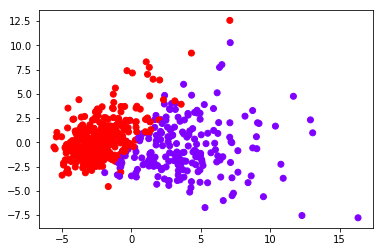

In [45]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='rainbow')

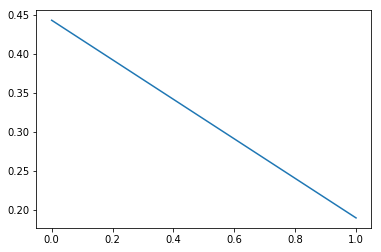

In [46]:
plt.plot(pca.explained_variance_ratio_)